# **What's the worth? Assessing CATE estimators and uplift models**

Nesrin Othmann (569694) and Öykü Ece Ayaz (610520)

Github link: https://github.com/eceayaz/Evaluation-of-CATE-and-Uplift-Models

# **1 Introduction**

Uplift Models are gaining more and more interest in the field of business, information systems and research. The basic goal of Uplift Models is to measure the change in a persons’ behavior due to a treatment, such as a marketing advertisement, political campaign or a medical treatment. The underlying problem of Uplift Modeling is the estimation of the causal inference, which is impossible to measure, because of the counterfactual nature of the treatment. A person can’t be either treated, e.g. receiving an E-Mail with advertisement, or not treated at the same time. Therefore, the evaluation of uplift modeling is a challenging task. Uplift Modeling is highly related to the estimation of the so-called conditional averge treatment effect, which in the core models the same issue, but from an econometrics perspective. Estimating the effect of a treatment on a person conditioned on his/her characteristics has the potential to target individuals for personalized treatments. In medicine e.g. it is of great interest to traget people who might heal most by taking a specific drug. Another example can be found in political context, where partys try to target people, who will vote a specific party or donate money to the party because they received a certain advertisement (White, 2018). This leads to different questions in different areas: Does a treatment really causes a change in behavior *because* of a treatment? Does a customer buy *because* of getting an e-mail with a coupon or because the customer would have bought already? Does the occupancy rate increase *because* of the price increase in a hotel? All of those questions are aimed at estimating if a specific treatment causes a specific outcome, such as the change of peoples behavior. All of these questions are of highly interest for researchers, politicians, economists and companies. Therefore, figuring out how Uplift Modeling can help to identify the people that respond because of a treatment and how the average treatment effect conditioned on characteristics of individuals can be estimated with machine learning techniques is of highly relevance.

# **2 CATE and Uplift Modeling**

## **2.1 Conditional Average Treatment Effect (CATE)**  
The goal of estimating the conditional average treatment effect (CATE) is to find heterogeneity of a treatment effect on a subgroup in the population (Abrevaya, Hsu and Lieli, 2015). The focus in evaluation techniques lies in the comparison of the  quality of different CATE estimates and the magnitude of the effect (Microsoft Research, 2018).The CATE can be represented in the following equation (Abrevaya et al., 2015): 


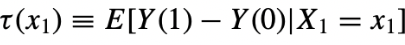

Y(1) in this equation stands for the outcome of a person that received treatment and Y(0) for a person that didn't get treated (Abrevaya et al., 2015).

Estimating the CATE can be found in Econometric Literature, where econometricians focus on the estimating the causal effect instead of trying to reach a high goodness of fit. The main procedure is to select a model and estimate the causal effect on the whole dataset. With estimating the CATE econometricians try to measure the causal influence of changing only one covariate, such as e.g. an increase in price while at the same time keeping the other covariates constant. Estimating the causal effect can go along with accepting a lower goodness of fit of a model. Econometric model performs well at predicting what happens to the number of purchases if one action such as increasing the price at a specific point and if there exist a causal relationship, rather than predicting well on a new and independent test dataset. Therefore, the interest lies in for example how strong the effect of an price increase might be or if the price increase leads to an increase or decrease in purchases or even lead to no change (Athey, 2018). A scenario for estimating the CATE would be e.g. that a company wants to measure the effect of a price increase of 5% on purchases and want to estimate the effect of that increase on the customers behavior conditioned on their characteristics.



## **2.2 Uplift**
Uplift Modeling is a field in Information Systems and Machine Learning. Supervised ML in contrary to econometrics relies on selection models driven by data and measuring the performance of models, rather than caring about inference (Athey and Imbens, 2017). In Uplift Modeling for example a scenario could be that a company is interested in the effect an e-mail with advertisment has on the purchase behavior of a customer, which seems to be kind of the same to CATE estimation. But in Uplift Modeling the main point lies in making good and reliable predictions about the customers that are most likely to purchase *because* of a treatment, such as an e-mail or price increase. So, predicting the right customer type and measure if they are e.g. customers that might churn or buy because of the treatment is a clear focus of Uplift Modeling (Radcliffe, 2007), wherease in Econometrics the magnitude of the effect and characteristics of the customers are more important (Microsoft Research, 2018).

The goal of Uplift Modeling is the estimation of difference in an outcome (e.g. purchase or response) probability of an individual if he/she receives a treatment or not (Radcliffe and Surry, 2011): 

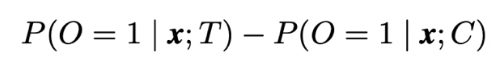

There exist four different types of customers. Customers that respond regardless of being treated or not are called Sure Things and Customers that wouldn't respond regardless of being treated or not are called Lost Causes. The interesting customers are the so-called Do-Not-Disturbs and Persuadables. The Do-Not-Disturbs respond if they get are let alone and don't receive a treatment, otherwise they would be stop responding. The Persuadables are the customers, whose response behavior changes because of receiving a treatment. Without receiving a treatment they wouldn't respond (Kane et al., 2014).

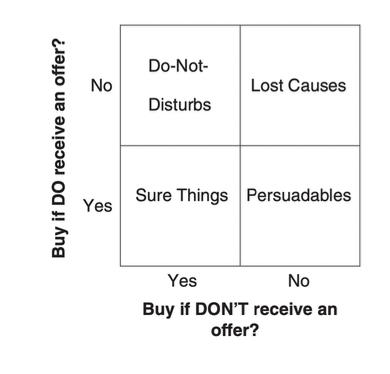

Uplift Modeling deals with customer targeting, which focuses on targeting the customers who are most likely to respond *because* of a treatment. This means, that these customers wouldn't respond if they wouldn't have been treated (Devriendt et al., 2018). Therefore, it would be best to not only target the Persuadables, but also the Do-Not-Disturbs, because they are the ones who are influenced in a bad way because of the treatment and stop responding. Therefore knowing which customers are Do-Not-Disturbs can be used to prevent customer churn (Kane et al. 2014). 

Many different Uplift Modeling procedures have been developed in the last 20 years, where the uplift is either estimated directly or indirectly. This notebook doesn't focus on Uplift Models in general, but on evaluation techniques, whose focus lies in the assessment of  predictions (Radcliffe and Surry, 2011). For a better understanding of the different evaluation techniques, the dataset presented in the following section is used to support the theoretical methodology with practical showcasing the different techniques.

## **2.3 Data presentation and preparation**

### **2.3.1 Hillstrom Data Set** 

The Hillstrom Dataset collected data of 64,000 obervations (customers) who buyed in the last twelve months. The data was collected in connection with a randomized controlled trial of a two week e-mail marketing campaign. One third of the observations have been treated with an e-mail marketing campaign of Mens Clothing, another third with an e-mail marketing campaign of Womens Clothing and the last third didn't get any treatment at all. The assignment to the different groups was chosen randomly. 

The covariates represent the characteristics of the customers including the number of month since the last purchase (**Recency**), the Categories of  the amount of dollars (**History_Segment**) and the actual dollar value (**History**) in spent in the last twelve months. Other information regarding to the characteristics are if the customers purchased Mens or Womens Clothing or got to be new customers in the last twelve months. The information is stored in the binary variables **Mens**, **Womens** and **Newbie** with 1 representing the purchase and 0 no purchase of clothing in the past year. The variable **Zip_Code** classifies differentiates between living in an Urban, Suburban, or Rural area and the variable **channel** represents the channel the customer used for the purchase in the past year. Within the Hillstrom dataset three different treatment variables exists: **Mens E-Mail**, **Womens E-Mail** and **No E-Mail**. For the outcome there also exist three different variables (binary). First the **Visit** variable, which gives information about if the customer visited the companies website in the following two weeks or not. The second variable **Conversion** indicates if the customer purchased clothes or not and the third variable **Spend** contains the actual dollars that have been spend in the two weeks after the e-mails have been sent (Hillstrom, 2008).

In [ ]:
import pandas as pd
#read the dataset
data = pd.read_csv('http://www.minethatdata.com/Kevin_Hillstrom_MineThatData_E-MailAnalytics_DataMiningChallenge_2008.03.20.csv') 

#consideration of only Womens E-Mail
dataset = data[data['segment'].isin(['No E-Mail','Womens E-Mail'])]

#conversion to binary variable 
dataset['segment'] = dataset.segment.apply(lambda x: 1 if x == 'Womens E-Mail' else 0)

#deletion of variable spend and conversion
del dataset['spend']
del dataset['conversion']

#conversion of categorial variables into integers
dataset['history_segment'] = dataset['history_segment'].astype("category").cat.codes
dataset['zip_code'] = dataset['zip_code'].astype("category").cat.codes
dataset['channel'] = dataset['channel'].astype("category").cat.codes

#reset index
dataset.reset_index(drop=True, inplace=True)

In [ ]:
dataset

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,segment,visit
0,10,1,142.44,1,0,1,0,1,1,0
1,6,2,329.08,1,1,0,1,2,0,0
2,7,1,180.65,0,1,1,1,2,1,0
3,2,0,45.34,1,0,2,0,2,1,0
4,6,1,134.83,0,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...
42688,10,2,304.30,1,1,1,0,2,1,1
42689,6,0,80.02,0,1,1,0,1,0,0
42690,1,2,306.10,1,0,1,1,1,1,0
42691,4,3,374.07,0,1,1,0,1,1,0


To keep the treatment variable a binary case, only the Womens E-Mail was taken into consideration because it worked out better in the Hillstrom Data Mining Challange (Radcliffe, 2008). 
In the following showcases the outcome variable is chosen to be the visit variable, because the variable Conversion only contain a very low number of obervations, which make the reliablility of results difficult (Soltys et al., 2015). Therefore, the variables spend and conversion are going to be deleted from the dataset.  The variables history_segment, zip_code and channel has to be converted into integer values (categories), because it works better with some Python packages when it comes to model fitting.

### **2.3.2 Fitting and Predicting the Model with CausalML**

CausalML is a Python library which supports both Uplift and CATE modelling. CausalML especially comes in handy with the aims of customer targeting optimization and the causal effects of treatments or experiments (Chen et al., 2020) . The library estimates CATE using different metalearners such as S/T/R/X learners. CausalML supports both experimental and observational data. 
In addition to statistical evaluation metrics found in most of the CATE libraries, CausalML also offers the metrics used in Uplift modeling such as cumulative gains charts, AUC values. CausalML also provides two validation approaches for CATE estimation:
obtaining multiple estimates using different metalearners and comparing values
generating synthetic data in order to observe the performance of the model on a similarly generated model.

In [ ]:
!pip install causalml
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from xgboost import XGBRegressor
import warnings
  
from causalml.inference.meta import LRSRegressor
from causalml.inference.meta import XGBTRegressor, MLPTRegressor
from causalml.inference.meta import BaseXRegressor, BaseRRegressor, BaseSRegressor, BaseTRegressor
from causalml.match import NearestNeighborMatch, MatchOptimizer, create_table_one
from causalml.propensity import ElasticNetPropensityModel
from causalml.dataset import *
from causalml.metrics import *

warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [ ]:
# Definition of Outcome, Covariates and Treatment variables
y = dataset['visit']
X = dataset.iloc[:,:8]
treatment = dataset['segment']

In the following part, the S-, T-, X- and R-Learner models are fitted and the predictions are made based on test data. For all learners XGB Regressors have been used to keep it consistent.

In [ ]:
#Reference: https://github.com/uber/causalml/blob/master/examples/meta_learners_with_synthetic_data.ipynb
#Fit the data to different metalearners

learner_s = BaseSRegressor(learner=XGBRegressor())
cate_s = learner_s.fit_predict(X=X, treatment=treatment, y=y)

learner_t = BaseTRegressor(learner=XGBRegressor())
cate_t = learner_t.fit_predict(X=X, treatment=treatment, y=y)

learner_x = BaseXRegressor(learner=XGBRegressor())
cate_x = learner_x.fit_predict(X=X, treatment=treatment, y=y)

learner_r = BaseRRegressor(learner=XGBRegressor())
cate_r = learner_r.fit_predict(X=X, treatment=treatment, y=y)

[18:43:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:43:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:43:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:44:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:44:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:44:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:44:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:46:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

The predictions are stored in cate_s, cate_t, cate_x and cate_r.

In [ ]:
print (cate_t)

[[0.01397192]
 [0.0199092 ]
 [0.07939509]
 ...
 [0.0037829 ]
 [0.02998349]
 [0.01411018]]


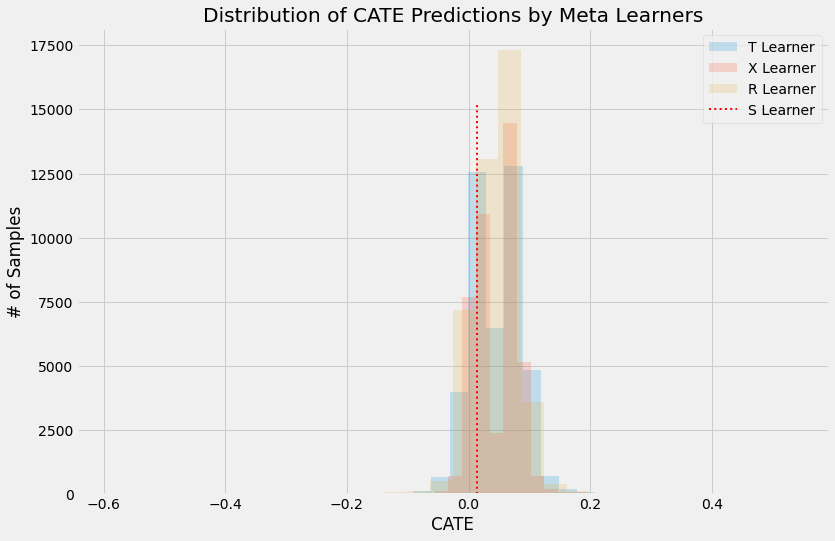

In [ ]:
#Plot the distributions of CATE estimations
alpha=0.2
bins=30
plt.figure(figsize=(12,8))
plt.hist(cate_t, alpha=alpha, bins=bins, label='T Learner')
plt.hist(cate_x, alpha=alpha, bins=bins, label='X Learner')
plt.vlines(cate_s[0], 0, plt.axes().get_ylim()[1], label='S Learner',
           linestyles='dotted', colors='red', linewidth=2)
plt.hist(cate_r, alpha=alpha, bins=bins, label='R Learner')
plt.title('Distribution of CATE Predictions by Meta Learners')
plt.xlabel('CATE')
plt.ylabel('# of Samples')
_=plt.legend()

# **3 Evaluation of Uplift Model Performance**


In general, the evaluation of the model performance can be obtained by the comparison of the individuals’ predicted uplift result with the individuals’ true outcome in a test data set, which was hold out. The difference in the results embody the error of the of the individual estimates, which accumulated provides the overall performance (Devriendt et al., 2018). However, the inclusion of the treatment variable leads to the fundamental problem of casual inference (Holland, 1986). The problem states, that a person cannot be treated and not treated at the same time (Gutierrez and Gerardy, 2016). Therefore, the known outcome variable isn’t observable in real world data and measures based on individual (point-wise) parametric view is not possible (Surry and Radcliffe, 2011). To still accomplish the evaluation of developed uplift models, some studies used simulated data sets (Lo, 2002). In literature there exist different evaluation metrics. They can be distinguished between the expression of models’ performance as a coefficient or on a visual basis.


After uplift values have been predicted, the population is ranked according to their worthiness/score for a certain goal, such as buying a certain product or in the case of uplift, the Lift. If they have a more valuable/positive Lift Performance, then they are ranked first. (Radcliffe, 2007). Furthermore, they are sorted in a specific number of segments, usually deciles, which represent the top 10% uplift scores (Kane, et al. 2014). 
The first step for evaluating Uplift Models with for example Uplift Bins, the Qini Coefficient, etc. is to sort the predicted values from the *best* to the *worst* (Radcliffe, 2007):



In [ ]:
# Ranking of the different Meta-Learners
predVector_s = pd.DataFrame(np.array(cate_s))
# ranking of the predicted values from the best to the worst
predrank_s = -predVector_s
predrank_s = predrank_s.rank()

predVector_t = pd.DataFrame(np.array(cate_t))
predrank_t = -predVector_t
predrank_t = predrank_t.rank()

predVector_x = pd.DataFrame(np.array(cate_x))
predrank_x = -predVector_x
predrank_x = predrank_x.rank()

predVector_r = pd.DataFrame(np.array(cate_r))
predrank_r = -predVector_r
predrank_r = predrank_r.rank()

In [ ]:
# include all the predcitions in one data frame
seg = pd.concat([dataset, predVector_s], axis=1)
seg.rename(columns = { seg.columns[10]: "predVector_s"}, inplace = True)
seg = pd.concat([seg, predrank_s], axis=1)
seg.rename(columns = { seg.columns[11]: "predrank_s"}, inplace = True)

seg = pd.concat([seg, predVector_t], axis=1)
seg.rename(columns = { seg.columns[12]: "predVector_t"}, inplace = True)
seg = pd.concat([seg, predrank_t], axis=1)
seg.rename(columns = { seg.columns[13]: "predrank_t"}, inplace = True)

seg = pd.concat([seg, predVector_x], axis=1)
seg.rename(columns = { seg.columns[14]: "predVector_x"}, inplace = True)
seg = pd.concat([seg, predrank_x], axis=1)
seg.rename(columns = { seg.columns[15]: "predrank_x"}, inplace = True)

seg = pd.concat([seg, predVector_r], axis=1)
seg.rename(columns = { seg.columns[16]: "predVector_r"}, inplace = True)
seg = pd.concat([seg, predrank_r], axis=1)
seg.rename(columns = { seg.columns[17]: "predrank_r"}, inplace = True)

seg

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,segment,visit,predVector_s,predrank_s,predVector_t,predrank_t,predVector_x,predrank_x,predVector_r,predrank_r
0,10,1,142.44,1,0,1,0,1,1,0,0.013215,32540.0,0.013972,30684.5,0.013713,32816.0,0.014439,30999.5
1,6,2,329.08,1,1,0,1,2,0,0,0.047707,22657.0,0.019909,28215.0,0.022409,25241.0,0.016834,28541.5
2,7,1,180.65,0,1,1,1,2,1,0,0.076623,2885.5,0.079395,10093.0,0.075705,10004.0,0.073965,11649.5
3,2,0,45.34,1,0,2,0,2,1,0,0.002122,40323.5,0.006110,34944.5,0.014131,32548.5,0.016458,29108.5
4,6,1,134.83,0,1,1,0,1,1,1,0.063588,18019.0,0.082244,8714.0,0.071521,13803.0,0.069123,14796.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42688,10,2,304.30,1,1,1,0,2,1,1,0.061811,18896.5,0.093185,4423.0,0.067082,16812.0,0.065140,17285.5
42689,6,0,80.02,0,1,1,0,1,0,0,0.067447,13162.5,0.079481,10034.0,0.081385,5430.0,0.080849,6648.5
42690,1,2,306.10,1,0,1,1,1,1,0,0.012285,34957.5,0.003783,35933.5,0.009057,35989.0,0.009129,36264.5
42691,4,3,374.07,0,1,1,0,1,1,0,0.065851,14949.0,0.029983,24975.5,0.050620,21797.0,0.046361,22000.0


## **3.1 Uplift Bins**

One possible evaluation technique are Uplift Bins. These present the uplift score for each decile of the model. The ration between the top and bottom decile or top decile and overall uplift is used to determine the quality of the model (Surry and Radcliffe, 2011).

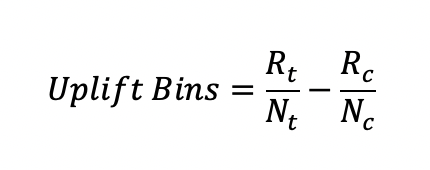

R_t represent the number of purchases/responses per bin in the treatment group and R_c  in the control group. N_t and N_c represents the number of observations per bin in the treatment and control group. The Uplift Bins are calculated per bin or segment (Naranjo, 2012). It is also a common approach to consider only the first k segments (cutoff), which is a straight forward procedure. One concern is, that this comes along with the issue that a variation of the cutoff can leads into reversed results of a comparison and thus indicate that one model is better than the other while they are  actually statisticalle equivalent (Surry and Radcliffe, 2011). Other critique of Uplift Bins lies in the lack of comparability of different uplift models with each other, because it only presents the uplift per segment (Karlsson, 2019).




In [ ]:
# assign number of segments/bins
Segments = 10

#calculate uplift bins for T-Learner
predVector = seg['predVector_t']
y = seg['visit']
ct = seg['segment']

#cut the data into deciles based on the predictions
decile = pd.qcut(seg['predrank_t'], q = Segments, duplicates='drop')
seg['decile'] = decile

In [ ]:
#getting Rc - Number of responses per bin in the control group 
seg2=seg[['visit','segment','decile']]
seg2=seg2.loc[seg2['segment'] == 0]
grouped = seg2.groupby('decile')
Rc = grouped['visit'].sum()
print (Rc)

#getting Rt - Number of responses per bin in the treatment group 
seg2=seg[['visit','segment','decile']]
seg2=seg2.loc[seg2['segment'] == 1]
grouped = seg2.groupby('decile')
Rt = grouped['visit'].sum()
print (Rt)

#getting Nc - Number of Observations per bin in the control group
seg2=seg[['visit','segment','decile']]
seg2=seg2.loc[seg2['segment'] == 0]
grouped = seg2.groupby('decile')
Nc = grouped['visit'].size()
print (Nc)

#getting Nt - Number of Observations per bin in the treatment group
seg2=seg[['visit','segment','decile']]
seg2=seg2.loc[seg2['segment'] == 1]
grouped = seg2.groupby('decile')
Nt= grouped['visit'].size()
print (Nt)

decile
(0.999, 4270.5]       174
(4270.5, 8533.0]      155
(8533.0, 12808.9]     168
(12808.9, 17075.5]    201
(17075.5, 21345.0]    261
(21345.0, 25616.5]    232
(25616.5, 29885.5]    211
(29885.5, 34155.1]    189
(34155.1, 38423.6]    241
(38423.6, 42693.0]    430
Name: visit, dtype: int64
decile
(0.999, 4270.5]       599
(4270.5, 8533.0]      423
(8533.0, 12808.9]     331
(12808.9, 17075.5]    359
(17075.5, 21345.0]    326
(21345.0, 25616.5]    290
(25616.5, 29885.5]    234
(29885.5, 34155.1]    242
(34155.1, 38423.6]    214
(38423.6, 42693.0]    220
Name: visit, dtype: int64
decile
(0.999, 4270.5]       2082
(4270.5, 8533.0]      2109
(8533.0, 12808.9]     2162
(12808.9, 17075.5]    2146
(17075.5, 21345.0]    2105
(21345.0, 25616.5]    2174
(25616.5, 29885.5]    2170
(29885.5, 34155.1]    2085
(34155.1, 38423.6]    2079
(38423.6, 42693.0]    2194
Name: visit, dtype: int64
decile
(0.999, 4270.5]       2188
(4270.5, 8533.0]      2161
(8533.0, 12808.9]     2106
(12808.9, 17075.5]    2

In [ ]:
#calculating the uplift per bin
uplift=(Rt/Nt)-(Rc/Nc)
print (uplift)

decile
(0.999, 4270.5]       0.190193
(4270.5, 8533.0]      0.122248
(8533.0, 12808.9]     0.079464
(12808.9, 17075.5]    0.075358
(17075.5, 21345.0]    0.026309
(21345.0, 25616.5]    0.031908
(25616.5, 29885.5]    0.014247
(29885.5, 34155.1]    0.020260
(34155.1, 38423.6]   -0.018204
(38423.6, 42693.0]   -0.090016
Name: visit, dtype: float64


Text(0.5, 1.0, 'Uplift Bins')

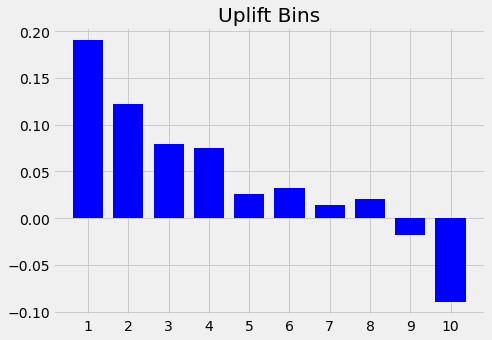

In [ ]:
#Bins of Uplift Plot for T-Learner
data = np.array(uplift)
ticks = np.arange(1, (uplift.count()+1))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.xaxis.set_ticks(ticks)
ax.bar(ticks, data, color = 'b', width = 0.75)
ax.set_title('Uplift Bins')

## **3.2 Uplift Curves and Qini Curves**



Uplift Curves are predicated on conventional gain curves, which are a reversed version of a Lorenz curve (Lorenz, 1905). After uplift values have been predicted and the population is ranked according to their score, the Uplift Curve itself is represented as follows: 

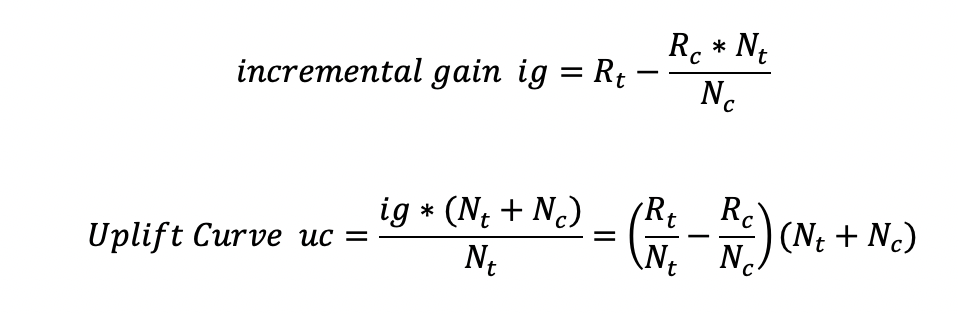

The Uplift and Qini Curve (incremental gain) are related to each other as it can be seen in the equation above. If the dataset contains a balanced treatment and control group, the Uplift Curve is proportional to the Qini Curve with the value of 2 (Gutierrez and Gerardy, 2016).
In cumulative incremental gain charts, the x-axis represents the number of observations/cumulative percentage of observations targeted and the y-axis represents the percentage of responders/nr of cumulative incremental purchases (Radcliffe, 2007)/net gain achieved on the targeted group (Soltys et al., 2015). In conventional gain charts, the y-axis represents the cumulative raw result, such as the number of purchases (Radcliffe and Surry, 2011). If the x-value would be at 100%, then the whole population would be treated (Soltys et al., 2015). 


In [ ]:
# Incremental gain per segment 
cig=(Rt/Nt.sum())-(Rc/Nc.sum())

# cumulative incremental gain
cumincrgain = cig.cumsum()
print(cumincrgain)

decile
(0.999, 4270.5]       0.019841
(4270.5, 8533.0]      0.032344
(8533.0, 12808.9]     0.039936
(12808.9, 17075.5]    0.047288
(17075.5, 21345.0]    0.050281
(21345.0, 25616.5]    0.052951
(25616.5, 29885.5]    0.053989
(29885.5, 34155.1]    0.056434
(34155.1, 38423.6]    0.055129
(38423.6, 42693.0]    0.045233
Name: visit, dtype: float64


In [ ]:
# overall incremental gain
oig = (Rt.sum()/Nt.sum())-(Rc.sum()/Nc.sum())
nr_deciles=Rt.count()
oig= np.repeat(oig, nr_deciles, axis=0)
Segm= np.repeat(nr_deciles, nr_deciles, axis=0)
print (oig)

[0.04523311 0.04523311 0.04523311 0.04523311 0.04523311 0.04523311
 0.04523311 0.04523311 0.04523311 0.04523311]


The Uplift and Qini Curve is compared to the random curve, which represents a random selection of observations for receiving the treatment (random targeting). In this case, the random curve starts at the origin of the graph until (N,n), where N is the total number of observations and n the number of responders, when all of the observations have been treated. At an angle of 45°, the model would be perfect and thus all purchases that has been made where caused by treatment. The reason for that is, because the responders are ranked higher and thus closer to the origin (Radcliffe, 2007). 

In [ ]:
# calculate random curve
Rand=oig/Segm
Rand_curve= Rand.cumsum()
Rand_curve

array([0.00452331, 0.00904662, 0.01356993, 0.01809324, 0.02261655,
       0.02713986, 0.03166317, 0.03618649, 0.0407098 , 0.04523311])

In [ ]:
Rand_curve = np.append(0, Rand_curve)
cumincrgain = np.append(0, cumincrgain)

Text(0.5, 1.0, 'Qini Curve')

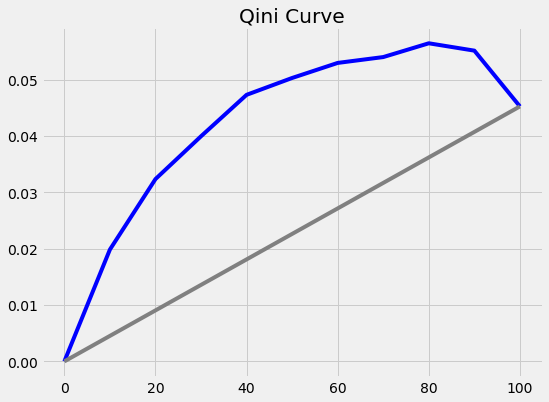

In [ ]:
# define x-axis
x_axis= np.arange(0, 100+(100/(len(cumincrgain)-1)), 100/(len(cumincrgain)-1))

# plot Qini Curve
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(8, 6))
ax.plot(x_axis,cumincrgain, label='Model', color='blue')
ax.plot(x_axis, Rand_curve, label='Random', color='grey')
ax.set_title('Qini Curve')

The model is only perfect if the last customer, who is one of e.g. 30% of the observers who were ranked highest, buys and therefore reaches the purchase rate of 30%. Each person is therefore a buyer in the first tenth of the population in response to the selection of a campaign (Radcliffe, 2007). For visualization of the perfect curve together with the qini curve in a graph, the Scikit-Uplift package in Python provides specific function (Scikit-Uplift, 2020).

In [ ]:
# install scikit-uplift package
!pip install scikit-uplift
from sklift.metrics import qini_auc_score
from sklift.viz import plot_qini_curve

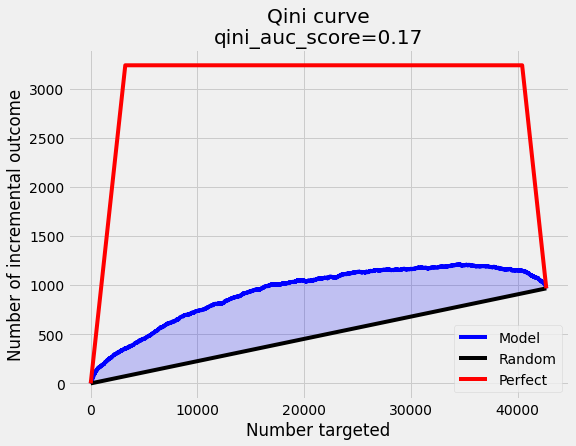

In [ ]:
# Plot Qini Curve of T-Learner with Scikit-Uplift and plot perfect curve
plot_qini_curve(y_true=seg['visit'], uplift=seg['predVector_t'], treatment=seg['segment'])

Then the graph runs horizontally or the curve can also fall again, since it must be noted that contacting customers can also prevent customers from buying because they feel disturbed. (Radcliffe, 2007). 

It is also possible to use the CausalML package for getting the qini curve and comparing them with each other. 

In [ ]:
# include all learner predictions in one variable
cate_s, cate_t, cate_x, cate_r = pd.DataFrame(cate_s), pd.DataFrame(cate_t), pd.DataFrame(cate_x), pd.DataFrame(cate_r)
cate_s, cate_t, cate_x, cate_r = cate_s.rename(index=str, columns={0:'cate_s'}), cate_t.rename(index=str, columns={0:'cate_t'}), cate_x.rename(index=str, columns={0:'cate_x'}), cate_r.rename(index=str, columns={0:'cate_r'})
learner = pd.DataFrame({'y': list(dataset['visit']), 'w': list(dataset['segment']), 'S-Learner': list(cate_s['cate_s']),
'T-Learner': list(cate_t['cate_t']),'X-Learner': list(cate_x['cate_x']),'R-Learner': list(cate_r['cate_r'])})


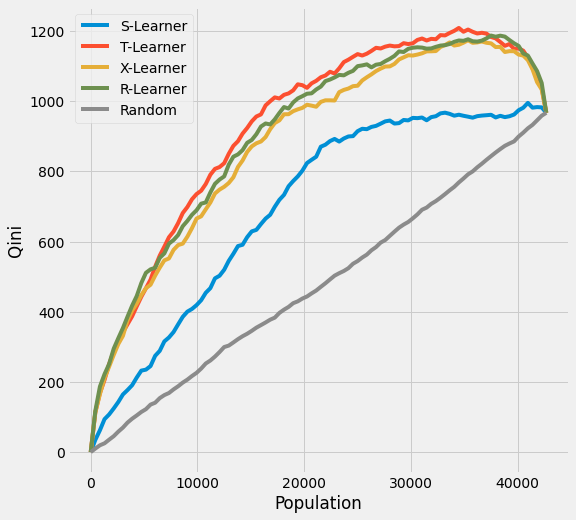

In [ ]:
# Qini Curve of the different learners with CausalML
plot_qini(learner, outcome_col='y', treatment_col='w')

On the first look, it seems that the S-Learner performs worse than the other three Meta-Learner, because its area between the S-Learner curve and random curve is smaller than the area of the others. The T-Learner seems to perform best. To get more exact confirmation of which Learner performs best, the Qini Coefficient can be used, which is introduced in the next sections.

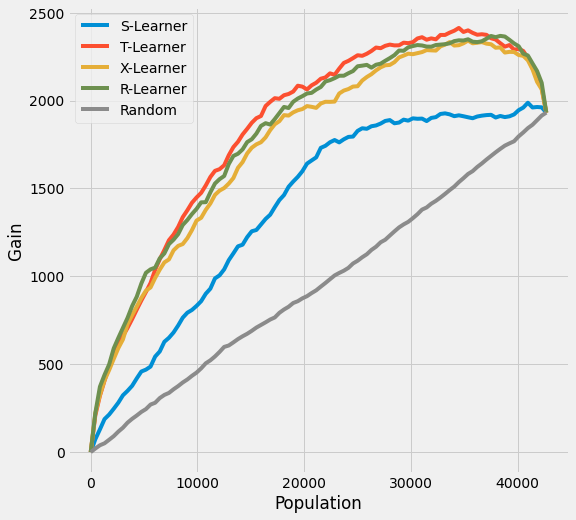

In [ ]:
# Uplift Curve of the different learners
plot_gain(learner, outcome_col='y', treatment_col='w')

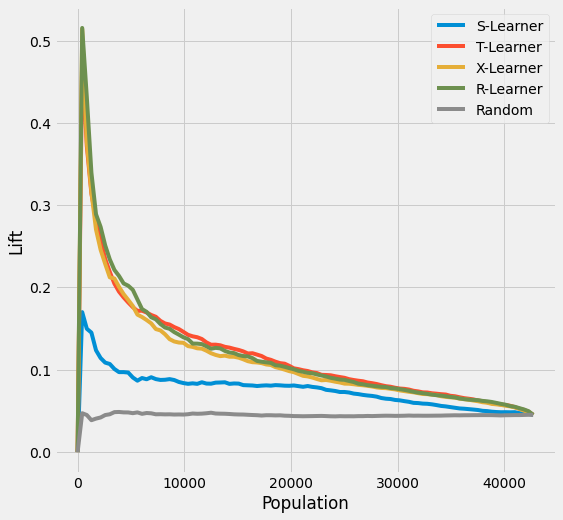

In [ ]:
# Plot of lift curves
plot_lift(learner, outcome_col='y', treatment_col='w')

## **3.3 AUUC and AUQC**

The area under the Uplift Curve is a performance estimate, which breaks down performance into one value. The AUUC can also reach a negative value, if the model shows high values but in fact the treatment leads into a negative impact (Jaskowski and Jaroszewicz, 2012). The AUQC correspons to the area under the Qini Curve calculated with the trapezoid formula and AURC to the area under the random curve also calculated with the trapezoid formula (Radcliffe, 2007).


In [ ]:
#Area under the Uplift-Curve
x = np.linspace(start=1/len(cumincrgain), stop=1, num=len(cumincrgain)).round(1)
y = np.array(cumincrgain)
AUC = 0;

for i in range(1,len(y)):
 width = x[i] - x[i-1]
 height = y[i] + y[i-1]
 AUCSegment = 0.5*width*height
 AUC =  AUC + AUCSegment
print (AUC)

#Top segment of the AUUC
AUC1 = 0.5*(x[1]-x[0])*(y[1]+y[0])

0.03820254093090789


In [ ]:
#Area under the random curve
x = np.linspace(start=(1/len(cumincrgain)), stop=1, num=len(cumincrgain)).round(1)
y = Rand_curve
AUCrand = 0;
for i in range(1,len(y)):
  width = x[i] - x[i-1]
  height = y[i] + y[i-1]
  AUCrandSegment = 0.5*width*height
  AUCrand = AUCrand + AUCrandSegment
print (AUCrand)

#Top segment
AUCrand1 = 0.5*(x[1]-x[0])*(y[1]+y[0])

0.020581063497109107


## **3.4 Qini Coefficient**

The Qini Coefficient is similar to the Gini Coefficient, besides the focus lies on incremental gain instead of the conventional gain curve. The Qini Coefficient is splitted into two different types: one which is used for binary outcomes and doesn't consider the negative effect of the optimal curve and another Qini Coefficient which is a general version (not coercively binary outcomes) of the other one and considers the negative effect. The Coefficient ranges from 1, which represents a perfect model with the best predictive power to 0 with no predictive power (Radcliffe, 2007). 

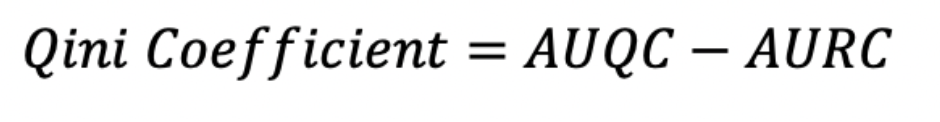

In [ ]:
#Difference of the areas: Qini-coefficient
Qini = AUC - AUCrand

#Qini top segment
QiniTop= AUC1-AUCrand1

print(Qini)
print(QiniTop)

0.017621477433798785
0.0007658821974576235


The different Qini Coefficients can also be received through the CausalML package: 

In [ ]:
# with CausalML
print(qini_score(learner, outcome_col='y', treatment_col='w'))
#print((learner, outcome_col='y', treatment_col='w'))

S-Learner    2.278366e-01
T-Learner    4.665288e-01
X-Learner    4.195168e-01
R-Learner    4.464749e-01
Random       5.709106e-15
dtype: float64


The T-Learner clearly has the best performance with a Qini Coefficient of 0.046 , followed by the R-Learner (0.045), the X-Learner (0.042) and the S-Learner with the lowest value of 0.023.

## **3.5 Adjusted Qini**

A slightly different version of the Qini Coefficient is the adjusted Qini, which is used if the number of people that are targeted is small and number of people in the treatment group are valued higher. The adjusted Qini creates a balance within overvaluing the high valued treatment group. This leads to less overspending (Yi and Frost, 2018).



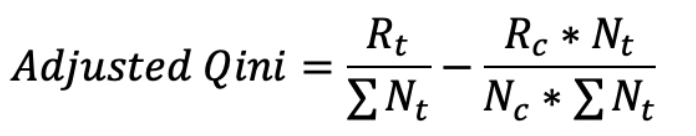

## **3.6 Maximum Profit  (MP) &  Maximum Profit Uplift (MPU) Metrics**



Maximum Profit Measure (MP)  is an evaluation metric commonly used in evaluating customer churn prediction (CCP) and customer churn uplift (CCU) models (Devriendt & Verbeke, 2018). MP measure maximizes the profit by cutting off the retention at a level that is optimal, rather than a arbitrary (10%) cutoff level (Devriendt & Verbeke, 2018). The profit is calculated using the formula (Neslin & Kamakura, 2006):


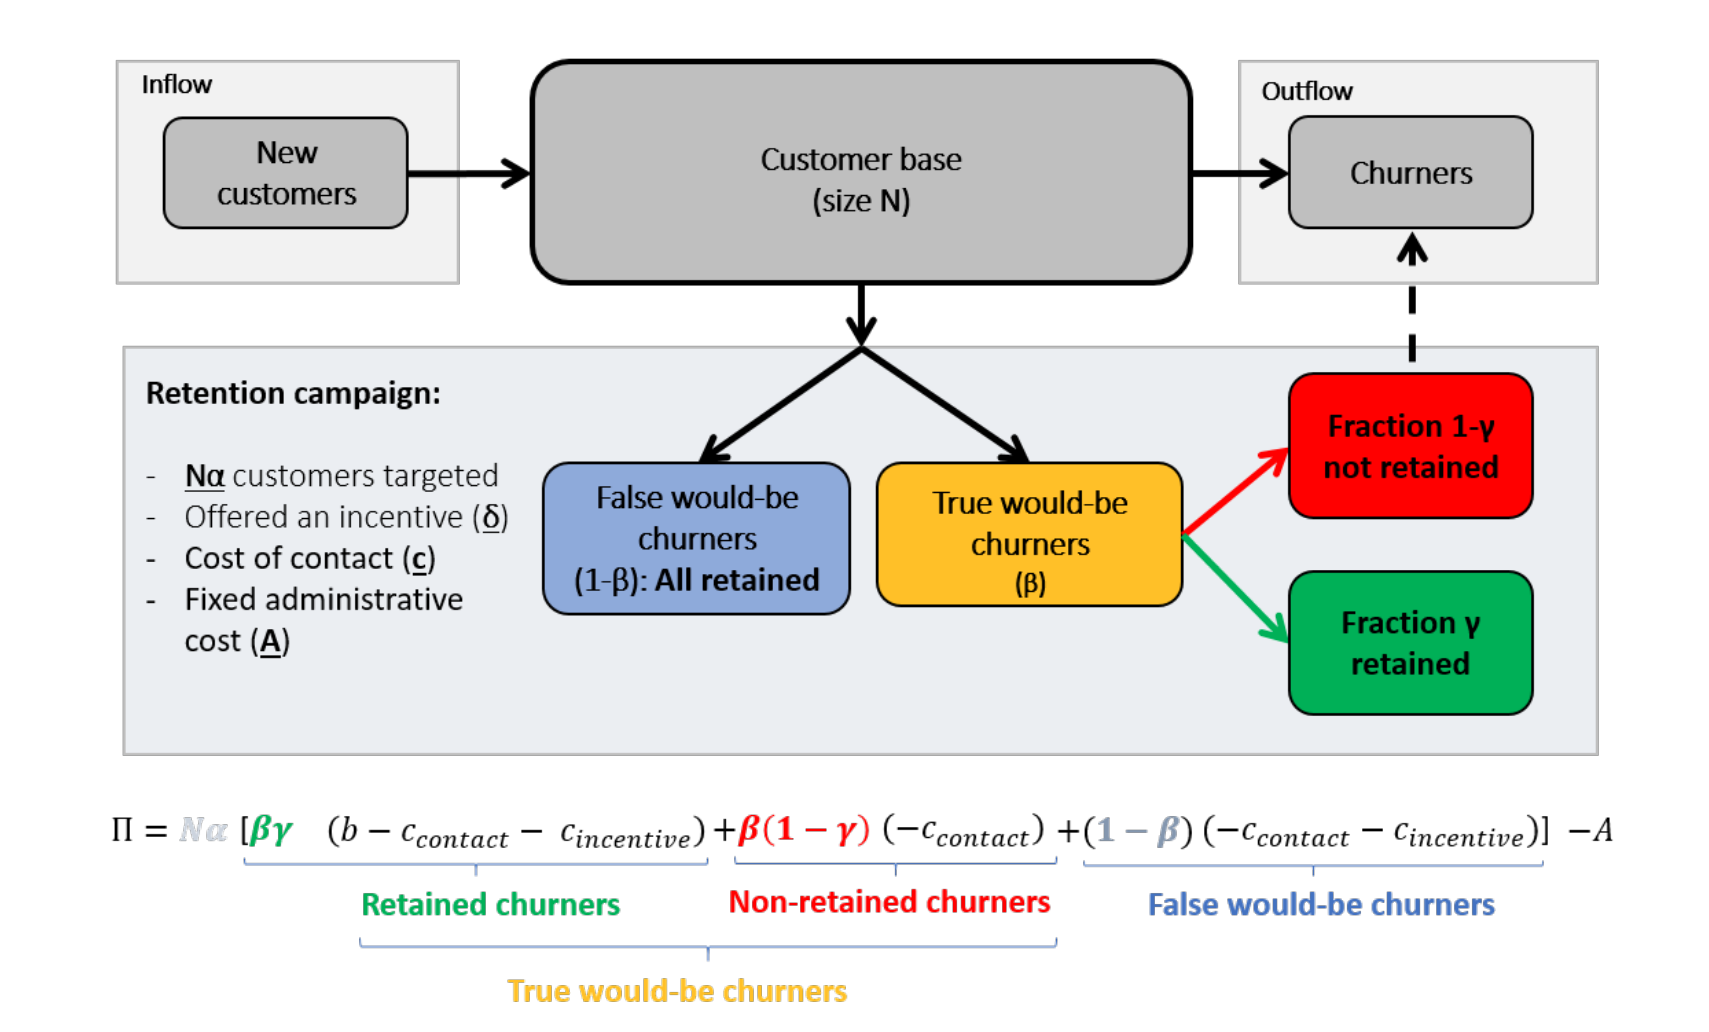

Hence the evaluation metric used to evaluate the customer churn uplift model is identified as below (Devriendt & Verbeke, 2018):
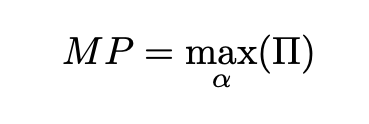

The MP is especially helpful to better assess the churn model when the profitability is the first concern, and stands out as an evaluation metric in uplift models since other metrics do not take profitability (costs and benefits) into account (Devriendt & Verbeke, 2018). Using MP metric, two assumptions should be made: 1) the retention rate is independent of the fraction of the customers included in the campaign  2) benefit b, also referred to as Customer Lifetime Value (CLV) is independent of the fraction of customers included in the campaign (Verbeke & Dejaeger, 2011). 

Maximum Profit Uplift (MPU) is another metric that was introduced by Devriednt and Verenke in 2018, extending the original MP measure further for uplift models. Both of the evaluation metrics can be used to assess models on observational data. 
MPU is specifically used for customer churn uplift modeling and it considers both treatment and the control groups involved in the campaign (Devriendt & Verenke 2018). MPU calculates the profit using the formula: 
# 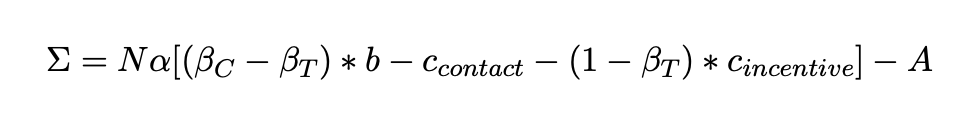

---





Then the metric maximizes the profit generated by all the  customers, just like MP does:


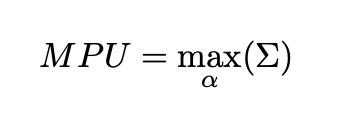

# **4. CATE Evaluation Methods**

## **4.1 Statistical Hypothesis Testing (p-value)** **(real data)**

Hypothesis testing is a test widely used in assessing the likelihood of observing the result assuming the test statistic follows a normal distribution ("t Test | Educational Research Basics by Del Siegle", 2020) under the null hypothesis. In CATE estimations, p-value allows to assess the probability of observing the outcomes collected from treatment group in the control group. It is a measure of how effective the treatment is found to be statistically. Hypothesis testing is commonly used in assessing the effects of medical treatments on heterogeneous groups as the area focuses more on the statistical importance and validity of the treatment. 

**4.1.1 Confidence Interval (real data)**

Confidence Intervals are the range of values that are estimated to include the unknown value and Confidence levels provide the specified probability of observing the result in the range ("Confidence Intervals", 2020). In CATE estimations, confidence intervals provide an insight to the statistical robustness of the estimate.

## **4.2 Loss Function Metrics: (synthetic data)**

Although loss functions are used to minimize the error found in the model, they also provide a measure of the error in the model and therefore can be used to judge the performance of the model. 


**4.2.1 Mean Squared Error (MSE)** 

One of the widely used loss functions is the mean value of sum of squared losses. It is the mean squared difference of the actual CATE estimator and the estimate. For. synthetic data, as the true CATE is observed, it is. calculated as follows (Gutierrez & Gerardy, 2016):
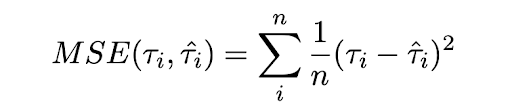

For observational data, as the true CATE is not observed, MSE is calculated using an estimate Y*: 

 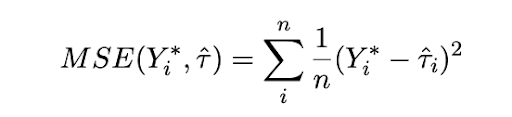

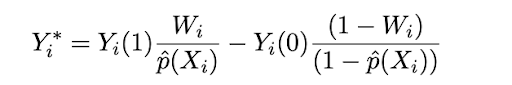

("Regression — Why Mean Square Error?", 2020)

**4.2.2 Mean Absolute Error (MAE)** 

MAE is another loss function which sums up the absolute differences of the error. 

**4.2.3 Root Mean Squared Error (RMSE)** 

RMSE is similar to MSE, however the order is reduced to 1 as the square root is calculated ("Regression — Why Mean Square Error?", 2020).


**4.2.4 Expected Mean Squared Error (EMSE)** 

EMSE is a loss function used to estimate CATE and is introduced by Künzel in 2019. In this approach, the function is concerned with the difference between the actual CATE estimator and the estimated CATE (Künzel, Sekhon, Bickel & Yu, 2019). EMSE is used to evaluate different metalearners and assumes there are no confounders (Künzel, Sekhon, Bickel & Yu, 2019). It is suitable for synthetic data.




# **5 CATE Evaluation Metrics in Python packages:**  
Several Python libraries which allow for CATE estimation also provide evaluation metrics. Most of the CATE Libraries already provide common statistical evaluation metrics such as hypothesis testing, p-value, and other loss function metrics. Additionally certain libraries also provide unique evaluation methods. DoWhy, CasualML,EconML are among the libraries to be investigated.

# **5.1 DoWhy & EconML**

DoWhy is a causal inference library and implements the models in four simple steps. It is especially used when the “why” of the data set and the causal effect of a treatment is investigated (McAteer, 2020). One of the different features of the library is that it allows to separate the identification and the estimation processes in causal inference. In the cases of governmental or moral interventions, DoWhy provides the means to investigate the causal inference and the effects of the treatment ("DoWhy | Making causal inference easy — DoWhy | Making Causal Inference Easy documentation", 2020). Dowhy supports linear regression, stratification methods and then estimates CATE provided with the target units (subgroup). CATE can be estimated by simple linear regression or through the help of machine learning CATE estimator of EconML package.


In [ ]:
!pip install dowhy
!pip install econml
import os, sys
sys.path.insert(1, os.path.abspath("../../../"))  # for dowhy source code
import numpy as np
import pandas as pd
import logging
import econml
import dowhy
from dowhy import CausalModel
import dowhy.datasets
import warnings
warnings.filterwarnings('ignore')

In our example, we use synthetic data and generate random data using DoWhy's dataset by specifying number of common causes, samples, instrument variables, treatments. 

In [ ]:
#generate a dataset using DoWhy's dataset
data = dowhy.datasets.linear_dataset(10, num_common_causes=2, num_samples=10000,
                                    num_instruments=1, num_effect_modifiers=1,
                                     num_treatments=1,
                                    treatment_is_binary=False,
                                    num_discrete_common_causes=2,
                                    num_discrete_effect_modifiers=1,
                                    one_hot_encode=False)
df=data['df']
df.head()

,X0,Z0,W0,W1,v0,y
0,1,0.0,3,2,5.625054,70.216006
1,2,0.0,1,3,4.996027,71.368845
2,1,0.0,2,2,5.017855,62.433577
3,2,0.0,3,3,6.776747,96.709044
4,1,0.0,3,0,3.644553,44.770745


1) First, the causal inference relationship as a diagram is modeled and shown as a causal  model which also allows to  see the assumptions and the confounders in the model.


INFO:dowhy.causal_model:Model to find the causal effect of treatment ['v0'] on outcome ['y']
INFO:dowhy.causal_graph:Using Matplotlib for plotting


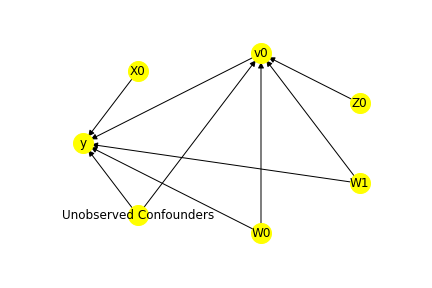

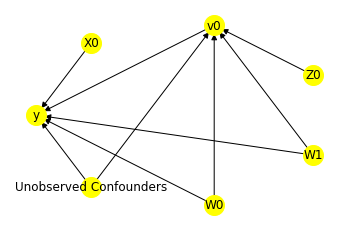

In [ ]:
model = CausalModel(data=data["df"],
                    treatment=data["treatment_name"], outcome=data["outcome_name"],
                    graph=data["gml_graph"])

model.view_model()
from IPython.display import Image, display
display(Image(filename="causal_model.png"))


2) The estimand and the assumptions are identified using only the causal relationship graph.

In [ ]:
identified_estimand= model.identify_effect()
print(identified_estimand)

INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['W1', 'W0', 'Unobserved Confounders']


WARN: Do you want to continue by ignoring any unobserved confounders? (use proceed_when_unidentifiable=True to disable this prompt) [y/n] y


INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:['Z0']


Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                        
─────(Expectation(y|W1,W0))
d[v₀]                      
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W1,W0,U) = P(y|v0,W1,W0)
### Estimand : 2
Estimand name: iv
Estimand expression:
Expectation(Derivative(y, [Z0])*Derivative([v0], [Z0])**(-1))
Estimand assumption 1, As-if-random: If U→→y then ¬(U →→{Z0})
Estimand assumption 2, Exclusion: If we remove {Z0}→{v0}, then ¬({Z0}→y)



3) The estimand is estimated through data.

In [ ]:
#Reference: https://microsoft.github.io/dowhy/example_notebooks/dowhy-conditional-treatment-effects.html
#Estimate CATE using EconML's double machine learning CATE estimator
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LassoCV
from sklearn.datasets import make_regression
from sklearn.preprocessing import PolynomialFeatures

dml_estimate = model.estimate_effect(identified_estimand, method_name="backdoor.econml.dml.DMLCateEstimator",
                                     control_value = 0,
                                     treatment_value = 1,
                                 target_units = 1,  # condition used for CATE
                                 confidence_intervals=False,
                                method_params={"init_params":{'model_y':GradientBoostingRegressor(),
                                                              'model_t': GradientBoostingRegressor(),
                                                              "model_final":LassoCV(),
                                                              'featurizer':PolynomialFeatures(degree=1, include_bias=True)},
                                                              "fit_params":{}})
print(dml_estimate)

INFO:dowhy.causal_estimator:INFO: Using EconML Estimator
INFO:dowhy.causal_estimator:b: y~v0+W1+W0+X0 | X0


*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                        
─────(Expectation(y|W1,W0))
d[v₀]                      
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W1,W0,U) = P(y|v0,W1,W0)
### Estimand : 2
Estimand name: iv
Estimand expression:
Expectation(Derivative(y, [Z0])*Derivative([v0], [Z0])**(-1))
Estimand assumption 1, As-if-random: If U→→y then ¬(U →→{Z0})
Estimand assumption 2, Exclusion: If we remove {Z0}→{v0}, then ¬({Z0}→y)

## Realized estimand
b: y~v0+W1+W0+X0 | X0
Target units: 

## Estimate
Mean value: 12.60727463190838



4) Final step is the validation. The estimand is tested against several refutation methods. Refutation plays a role as an evaluation strategy as it tests the robustness (sensitivity) of the estimates through several refutation methods. Adding a random common cause, removing a random subset of data, replacing the treatment with a placebo variable are among the refutation methods DoWhy offers. The idea behind the refutation methods is to compare the estimand values before and after the refutation, thus concluding the robustness of the estimate.

In [ ]:
res_random=model.refute_estimate(identified_estimand, dml_estimate, method_name="random_common_cause")
print(res_random)

INFO:dowhy.causal_estimator:INFO: Using EconML Estimator
INFO:dowhy.causal_estimator:b: y~v0+W1+W0+w_random+X0 | X0


Refute: Add a Random Common Cause
Estimated effect:12.60727463190838
New effect:12.579769043973519



In [ ]:
res_unobserved=model.refute_estimate(identified_estimand, dml_estimate, method_name="add_unobserved_common_cause",
                                     confounders_effect_on_treatment="linear", confounders_effect_on_outcome="linear",
                                    effect_strength_on_treatment=0.01, effect_strength_on_outcome=0.02)
print(res_unobserved)

INFO:dowhy.causal_estimator:INFO: Using EconML Estimator
INFO:dowhy.causal_estimator:b: y~v0+W1+W0+X0 | X0


Refute: Add an Unobserved Common Cause
Estimated effect:12.60727463190838
New effect:12.614195401030276



In [ ]:
res_unobserved=model.refute_estimate(identified_estimand, dml_estimate, method_name="add_unobserved_common_cause",
                                     confounders_effect_on_treatment="linear", confounders_effect_on_outcome="linear",
                                    effect_strength_on_treatment=1, effect_strength_on_outcome=1)
print(res_unobserved)

INFO:dowhy.causal_estimator:INFO: Using EconML Estimator
INFO:dowhy.causal_estimator:b: y~v0+W1+W0+X0 | X0


Refute: Add an Unobserved Common Cause
Estimated effect:12.60727463190838
New effect:11.548564762137156



In [ ]:
res_subset=model.refute_estimate(identified_estimand, dml_estimate,
        method_name="data_subset_refuter", subset_fraction=0.8)
print(res_subset)

INFO:dowhy.causal_refuters.data_subset_refuter:Refutation over 0.8 simulated datasets of size 8000.0 each
INFO:dowhy.causal_estimator:INFO: Using EconML Estimator
INFO:dowhy.causal_estimator:b: y~v0+W1+W0+X0 | X0
INFO:dowhy.causal_estimator:INFO: Using EconML Estimator
INFO:dowhy.causal_estimator:b: y~v0+W1+W0+X0 | X0
INFO:dowhy.causal_estimator:INFO: Using EconML Estimator
INFO:dowhy.causal_estimator:b: y~v0+W1+W0+X0 | X0
INFO:dowhy.causal_estimator:INFO: Using EconML Estimator
INFO:dowhy.causal_estimator:b: y~v0+W1+W0+X0 | X0
INFO:dowhy.causal_estimator:INFO: Using EconML Estimator
INFO:dowhy.causal_estimator:b: y~v0+W1+W0+X0 | X0
INFO:dowhy.causal_estimator:INFO: Using EconML Estimator
INFO:dowhy.causal_estimator:b: y~v0+W1+W0+X0 | X0
INFO:dowhy.causal_estimator:INFO: Using EconML Estimator
INFO:dowhy.causal_estimator:b: y~v0+W1+W0+X0 | X0
INFO:dowhy.causal_estimator:INFO: Using EconML Estimator
INFO:dowhy.causal_estimator:b: y~v0+W1+W0+X0 | X0
INFO:dowhy.causal_estimator:INFO: Usin

Refute: Use a subset of data
Estimated effect:12.60727463190838
New effect:12.61238319628525
p value:0.25



In [ ]:
res_placebo=model.refute_estimate(identified_estimand, dml_estimate,
        method_name="placebo_treatment_refuter", placebo_type="permute")
print(res_placebo)

INFO:dowhy.causal_refuters.placebo_treatment_refuter:Refutation over 100 simulated datasets of permute treatment
INFO:dowhy.causal_estimator:INFO: Using EconML Estimator
INFO:dowhy.causal_estimator:b: y~placebo+W1+W0+X0 | X0
INFO:dowhy.causal_estimator:INFO: Using EconML Estimator
INFO:dowhy.causal_estimator:b: y~placebo+W1+W0+X0 | X0
INFO:dowhy.causal_estimator:INFO: Using EconML Estimator
INFO:dowhy.causal_estimator:b: y~placebo+W1+W0+X0 | X0
INFO:dowhy.causal_estimator:INFO: Using EconML Estimator
INFO:dowhy.causal_estimator:b: y~placebo+W1+W0+X0 | X0
INFO:dowhy.causal_estimator:INFO: Using EconML Estimator
INFO:dowhy.causal_estimator:b: y~placebo+W1+W0+X0 | X0
INFO:dowhy.causal_estimator:INFO: Using EconML Estimator
INFO:dowhy.causal_estimator:b: y~placebo+W1+W0+X0 | X0
INFO:dowhy.causal_estimator:INFO: Using EconML Estimator
INFO:dowhy.causal_estimator:b: y~placebo+W1+W0+X0 | X0
INFO:dowhy.causal_estimator:INFO: Using EconML Estimator
INFO:dowhy.causal_estimator:b: y~placebo+W1+W0

Refute: Use a Placebo Treatment
Estimated effect:12.60727463190838
New effect:0.002987795212397712
p value:0.68



Refutation methods play a role to assess the robustness and the sensitivity of the estimands. In our example, we can see that the estimated effect and the new effect after the refutation method is applied have usually close values, e.g. 17.2335 changes to 17.2335 after refutation. In the last refutation, we replace the treatment with a placebo variable and see that the new effect is now 0.0042 indicating that the treatment was in fact effective and was not producing the results by chance.



# **5.3 EconML**




The EconML package from Microsoft Research was developed with the goal of using State-of-the-Art Machine Learning techniques for estimating the CATE from observational data. Combined with econometrics, the package the package can help to interpret causality of CATE models within providing interpretable trees that can show which characteristics people have or should have to likely respond because of a treatment (Microsoft Research, 2019). In the following
section Meta-Learners are used as above within the CausalML package, but with the Gradient Boosting Algorithm.

In [ ]:
# install econml package
!pip install econml

# Main imports
from econml.metalearners import TLearner, SLearner, XLearner

# Helper imports 
import numpy as np
from numpy.random import binomial, multivariate_normal, normal, uniform
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, GradientBoostingClassifier
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split

# EconML imports
from econml.dml import LinearDMLCateEstimator, ForestDMLCateEstimator
from econml.cate_interpreter import SingleTreeCateInterpreter, SingleTreePolicyInterpreter
import graphviz

In [ ]:
import pandas as pd
#read the dataset
data = pd.read_csv('http://www.minethatdata.com/Kevin_Hillstrom_MineThatData_E-MailAnalytics_DataMiningChallenge_2008.03.20.csv') 

#consideration of only Womens E-Mail
dataset = data[data['segment'].isin(['No E-Mail','Womens E-Mail'])]

#conversion to binary variable 
dataset['segment'] = dataset.segment.apply(lambda x: 1 if x == 'Womens E-Mail' else 0)

#deletion of variable spend and conversion
del dataset['spend']
del dataset['conversion']

#conversion of categorial variables into integers
dataset['history_segment'] = dataset['history_segment'].astype("category").cat.codes
dataset['zip_code'] = dataset['zip_code'].astype("category").cat.codes
dataset['channel'] = dataset['channel'].astype("category").cat.codes

#reset index
dataset.reset_index(drop=True, inplace=True)

In [ ]:
train, valid = train_test_split(dataset, test_size=0.25)
names=['recency','history_segment','history','mens','womens','zip_code','newbie','channel']

Y = train['visit'].to_numpy()
T = train['segment'].to_numpy()
X = train[names].to_numpy()
X_test = valid[names].to_numpy()

In [ ]:
est = SLearner(overall_model=GradientBoostingRegressor())
est.fit(Y, T, np.hstack([X]), inference = 'bootstrap')
treatment_effects = est.effect(np.hstack([X_test]))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   45.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.6min finished


For the Meta Learner a so-called Single Decision Tree can be built in the EconML package. 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.3s finished


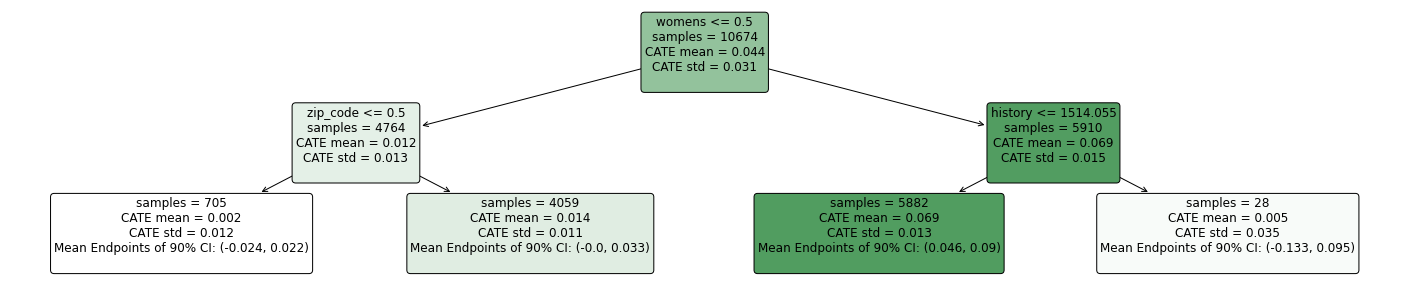

In [ ]:
intrp = SingleTreeCateInterpreter(include_model_uncertainty=True, max_depth=2, min_samples_leaf=10)
intrp.interpret(est, X_test)

%matplotlib inline

plt.figure(figsize=(25, 5))
intrp.plot(feature_names=names, fontsize=12)

Going along this decision tree (S-Learner) it can be seen that about 10674 customers in general respond positive ( green) to the treatment. If these people haven't bought womens clothes in the last year (left branch) and have a zip code of bigger than 0.5 (right branch on the left side), then they have a slightly positive respond (light green) to the treatment with a CATE of 0.011. Thus, treating those people just has a slightly positive impact. Having a look at the right branch of the tree, 5910 people who have bought womens clothes in the last year tend to show a strong positive reaction to the treatment (dark green). But if these people in addition have bought products with value smaller of 1514 $, a treatment tend to have a positive impact (green) with a CATE of 0.069, for whom treating should be taken into consideration.

In [ ]:
est = TLearner(models=GradientBoostingRegressor())
est.fit(Y, T, np.hstack([X]), inference = 'bootstrap')
treatment_effects = est.effect(np.hstack([X_test]))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   32.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.0min finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.0s finished


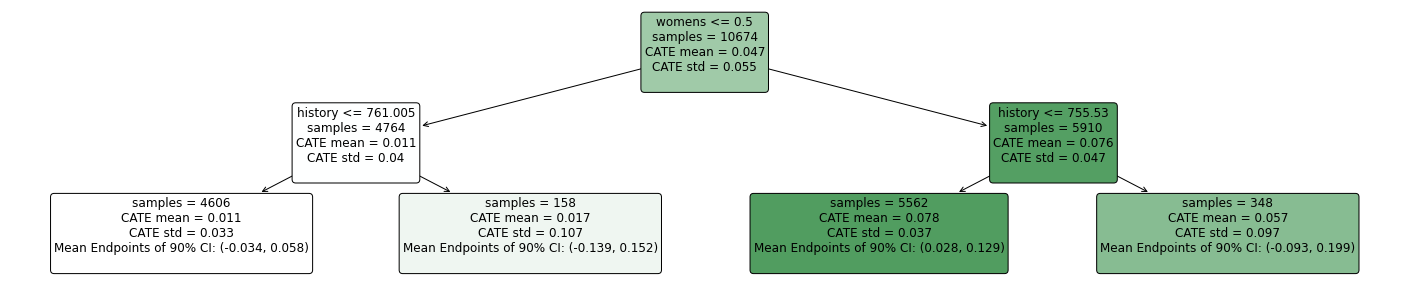

In [ ]:
intrp = SingleTreeCateInterpreter(include_model_uncertainty=True, max_depth=2, min_samples_leaf=10)
intrp.interpret(est, X_test)
plt.figure(figsize=(25, 5))
intrp.plot(feature_names=names, fontsize=12)

The decision Tree of the S-Learner is slightly different to the decision tree of the T-Learner. The left branch shows that people that haven't bought any womens clothes in the last year aren’t influenced by a treatment. If people bought womens clothes in the last year and purchased products with more than about 756 $, they are positively influenced by a treatment with a CATE of 0.078

In [ ]:
est = XLearner(models=GradientBoostingRegressor(),
              propensity_model=GradientBoostingClassifier(),
              cate_models=GradientBoostingRegressor())
est.fit(Y, T, np.hstack([X]))
treatment_effects = est.effect(np.hstack([X_test]))

# Fit with bootstrap confidence interval construction enabled
est.fit(Y, T, np.hstack([X]), inference='bootstrap')
treatment_effects = est.effect(np.hstack([X_test]))
lb, ub = est.effect_interval(np.hstack([X_test]), alpha=0.05) # Bootstrap CIs

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  6.4min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    7.3s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.2s finished


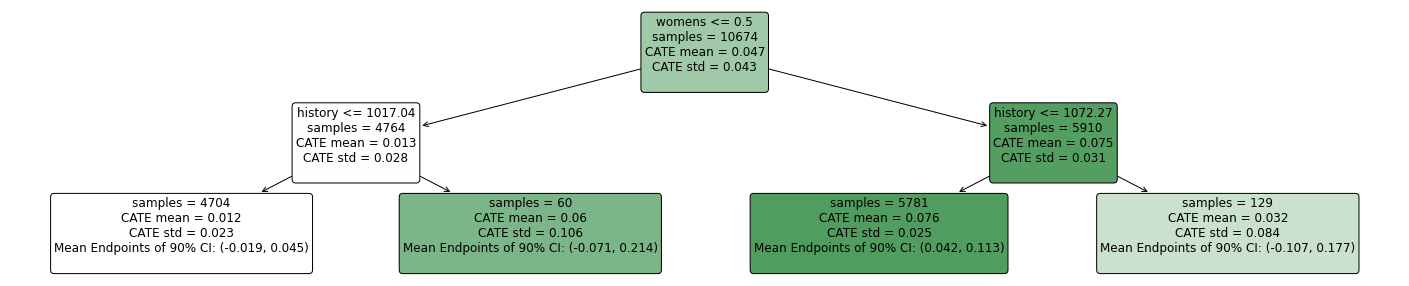

In [ ]:
intrp = SingleTreeCateInterpreter(include_model_uncertainty=True, max_depth=2, min_samples_leaf=10)
intrp.interpret(est, X_test)
plt.figure(figsize=(25, 5))
intrp.plot(feature_names=names, fontsize=12)

The decision Tree of the X-Learner is similar to the decision tree of the S-Learner and can be interpreted in a similar way. If there would exist a negative impact, the fields would be red. It would be a negative impact with a negative CATE, but in this experimental design, the results impacts just have been either positive or with no impact.

# **6 Conclusion**

In this paper, we aimed to gather the evaluation methods and metrics that are used to assess Uplift models and CATE estimations. Uplift models and CATE estimations are commonly assessed based on statistical performance metrics that are widely used in econometrics. Nevertheless, there have been specific evaluation methods introduced in the literature for both uplift models and CATE estimations. For CATE, there are several libraries that can be used to estimate and assess the estimations. This paper focused on DoWhy, EconML, scikit-uplift and CausalML libraries as they bring different perspectives and features that can be applied to different use scenarios. As it can be seen in the practical part, using Meta-Learners estimating CATE can lead to different results depending on the goal of which information should be received. Within the usage of CausalML and receiving the Qini Curves and Coefficients, the goal was to identify the best Meta-Learner model, which can be successfully target the customers who are purchasing or getting earnings because of the treatment and whose probability to purchase or get earnings increases most because of the treatment. With using EconML and the SingleTreeCateInterpreter, the goal lied in getting more insights into the covariates or characteristics of a person that leads to responding due to a treatment. The results clearly show the relevance and advantages of using Uplift Modeling and Machine Learning on economics, because of easily getting useful and important information of which customers should be treated. Thus, using Machine Learning for issues in estimating the CATE is highly recommended. 






# **Bibliography**

*   Athey, S. (2018). The Impact of Machine Learning on Economics. The Economics of Artificial Intelligence: An Agenda. University of Chicago Press. 

*   Athey, S. and Imbens, G. W. (2017). The State of Applied Econometrics: Causality and Policy Evaluation. Journal of Economic Perspectives, 31(2):3–32.

*   Abrevaya, J., Hsu, Y.-C., and Lieli, R. P. (2013). Estimating Conditional Average Treatment Effects. working paper.

*   Chen, Huigang & Harinen, Totte & Lee, Jeong-Yoon & Yung, Mike & Zhao, Zhenyu. (2020). CausalML: Python Package for Causal Machine Learning.

*   Confidence Intervals. (2020). Retrieved 27 August 2020, from http://www.stat.yale.edu/Courses/1997-98/101/confint.htm

*  Devriendt, F., & Verbeke, W. (2018). The case for prescriptive analytics: a novel maximum profit measure for evaluating and comparing customer churn prediction and uplift models. (pp. 1-29). (ES Working Paper; No. 12). Vrije Universiteit Brussel, Faculteit Economische en Sociale Wetenschappen & Solvay Business School.

*   Devriendt, F., Moldovan, D. and Verbeke, W. (2018) A Literature Survey and Experimental Evaluation of the State- of-the-Art in Uplift Modeling: A Stepping Stone Toward the Development of Prescriptive Analytics, Big Data, 6.1, pp.13-41.

*   DoWhy | Making causal inference easy — DoWhy | Making Causal Inference Easy documentation. (2020). Retrieved 27 August 2020, from https://microsoft.github.io/dowhy/

*   Gutierrez, P., & Gérardy, J. (2016). Causal Inference and Uplift Modelling: A Review of the Literature. PAPIs.

*   Hillstrom, K. (2008) Kevin Hillstrom: MineThatData. The MineThatData E-Mail Analytics and Data Mining Challenge. https://blog.minethatdata.com/2008/03/minethatdata-e-mail-analytics-and-data.html  

*   Holland, P.W. (1986) Statistics and Causal Inference. Journal of the American Statistical Association, 81(396), 945- 960. 

*   Jaskowski M. and Jaroszewicz S. (2012) Uplift modeling for clinical trial data. ICML, 2012 workshop on machine learning for clinical data analysis. Edinburgh, Scotland.

*   Kane, K., Lo, V. S., and Zheng. J. (2014). Mining for the Truly Responsive Customers and Prospects Using True-Lift Modeling: Comparison of New and Existing Methods. Journal of Marketing Analytics, 82(4), 218-238. 

* Karlsson, H. (2019). Uplift Modeling : Identifying Optimal Treatment Group Allocation and Whom to Contact to Maximize Return on Investment. Linköping University, Department of Computer and Information Science, The Division of Statistics and Machine Learning.

*   Künzel, S., Sekhon, J., Bickel, P., & Yu, B. (2019). Metalearners for estimating heterogeneous treatment effects using machine learning. Proceedings Of The National Academy Of Sciences, 116(10), 4156-4165. doi: 10.1073/pnas.1804597116

*   Lo, V. S. (2002). The True Lift Model: A Novel Data Mining Approach to Response Modeling in Database Marketing. ACM SIGKDD Explorations Newsletter, 4(2), 78-86.

*   Lorenz, M. (1905). Methods of Measuring the Concentration of Wealth. Publications of the American Statistical Association, 9(70), 209-219. doi:10.2307/2276207

*    McAteer, M. (2020). Practical Causal Inference Putting Judea Pearl's ideas into actual code [Matthew McAteer]. Retrieved from https://matthewmcateer.me/blog/practical-causal-inference/

* Naranjo, O.M. (2012) Testing a New Metric for Uplift Modeling. 

*   Neslin, Scott & Gupta, Sunil & Kamakura, Wagner & Lu, Junxiang & Mason, Charlotte. (2006). Defection Detection: Measuring and Understanding the Predictive Accuracy of Customer Churn Models. Journal of Marketing Research American Marketing Association ISSN. 43. 204-211. 10.1509/jmkr.43.2.204. 

*    Radcliffe, N. J., (2007). Using Control Groups to Target on Predicted Lift: Building and Assessing Uplift Models. Direct Marketing Journal, Direct Marketing Association Analytics Council (1), pp. 14-21.

*    Radcliffe, N. (2008) Hillstrom’s MineThatData Email Analytics Challenge: An Approach Using Uplift Modeling. Stochastic Solutions Limited.

*    Radcliffe, N. J. and Surry, P. D. (2011). Real-World Uplift Modelling with Significance Based Uplift Trees. White Paper TR-2011-1. Stochastic Solutions. 

* Scikit-Uplift (2020). scikit-uplift. https://www.uplift-modeling.com/en/latest/ 

*   Soltys, M., Jaroszewicz, S. and Rzepakowski, P. (2015) Ensemble methods for uplift modeling. Data Mining and Knowledge Discovery, 29, 1531–1559.

*   Surry,  P. D. and Radcliffe, N. J. (2011). Quality measures for uplift models. submitted to KDD2011.

*   Regression — Why Mean Square Error?. (2020). Retrieved 27 August 2020, from https://towardsdatascience.com/https-medium-com-chayankathuria-regression-why-mean-square-error-a8cad2a1c96f

*   t Test | Educational Research Basics by Del Siegle. (2020). Retrieved 27 August 2020, from https://researchbasics.education.uconn.edu/t-test/#

*   Verbeke, W., Dejaeger, K., Martens, D., Hur, J. and Baesens, B. (2012). New insights into churn prediction in the telecommunication sector: A profit driven data mining approach. European Journal of Operational Research, Elsevier, vol. 218(1), pages 211-229.

* White, M. (2018) Explicitly optimizing on causal effects via the causal random forest: a practical introduction and tutorial. https://www.markhw.com/blog/causalforestintro

* Yi, R. and Frost, W. (2018) Pylift: A Fast Python Package for Uplift Modeling. https://tech.wayfair.com/data-science/2018/10/pylift-a-fast-python-package-for- uplift-modeling/ 



